# 1. **READ LIBRARIES**

In [ ]:
#Read libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn. metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# 2. **READ FILE**

In [ ]:
#Read file Data.xlsx
df1 = pd.read_excel('Data.xlsx', sheet_name='Charges')
df2 = pd.read_excel('Data.xlsx', sheet_name='Other data')
df3 = pd.read_excel('Data.xlsx', sheet_name='Churn')
print("df1.shape", df1.shape)
print("df2.shape", df2.shape)
print("df3.shape", df3.shape)

df1.shape (7043, 3)
df2.shape (7043, 18)
df3.shape (7043, 2)


# 3. **CLEAN DATA**

In [ ]:
#Drop duplicates of column customerID
df1.drop_duplicates(subset='customerID', inplace=True)
df2.drop_duplicates(subset='customerID', inplace=True)
df3.drop_duplicates(subset='customerID', inplace=True)
print("df1.shape", df1.shape)
print("df2.shape", df2.shape)
print("df3.shape", df3.shape)

df1.shape (7043, 3)
df2.shape (7043, 18)
df3.shape (7043, 2)


In [ ]:
#Type of df1, df2 and df3
print("Charges:\n", df1.dtypes)
print("\nOther data:\n", df2.dtypes)
print("\nChurn: ", df3.dtypes)

Charges:
 customerID         object
MonthlyCharges    float64
TotalCharges       object
dtype: object

Other data:
 customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

Churn:  customerID    object
Churn         object
dtype: object


In [ ]:
#Change SeniorCitizen column to object type
df2['SeniorCitizen'] = df2['SeniorCitizen'].astype('object')

In [ ]:
#Find missing values
print("Missing values sheet1\n", df1.isnull().sum())
print("Missing values sheet2\n", df2.isnull().sum())
print("Missing values sheet3\n", df3.isnull().sum())

Missing values sheet1
 customerID         0
MonthlyCharges     7
TotalCharges      20
dtype: int64
Missing values sheet2
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
dtype: int64
Missing values sheet3
 customerID    0
Churn         0
dtype: int64


In [ ]:
#Replace empty strings with NaN before converting to float64
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
#Change TotalCharges column to float64
df1['TotalCharges'] = df1['TotalCharges'].astype('float64')
print(df1.dtypes)

customerID         object
MonthlyCharges    float64
TotalCharges      float64
dtype: object


In [ ]:
#Fill missing values of MonthlyCharges dividing TotalCharges by df2 column tenure
df1.MonthlyCharges=df1.MonthlyCharges.fillna(df1['TotalCharges'] / df2['tenure'])
#Fill missing values of TotalCharges with a multiplication of tenure by MonthlyCharges
df1.TotalCharges=df1.TotalCharges.fillna(df2['tenure'] * df1['MonthlyCharges'])

# 4. **VISUALIZE DATA**

In [ ]:
#Join table df1, df2 and df3
df=df1.join(df2.set_index('customerID'), on='customerID').join(df3.set_index('customerID'), on='customerID')
#Create main varibale and drop customerID column
df=df.drop(['customerID'], axis=1)


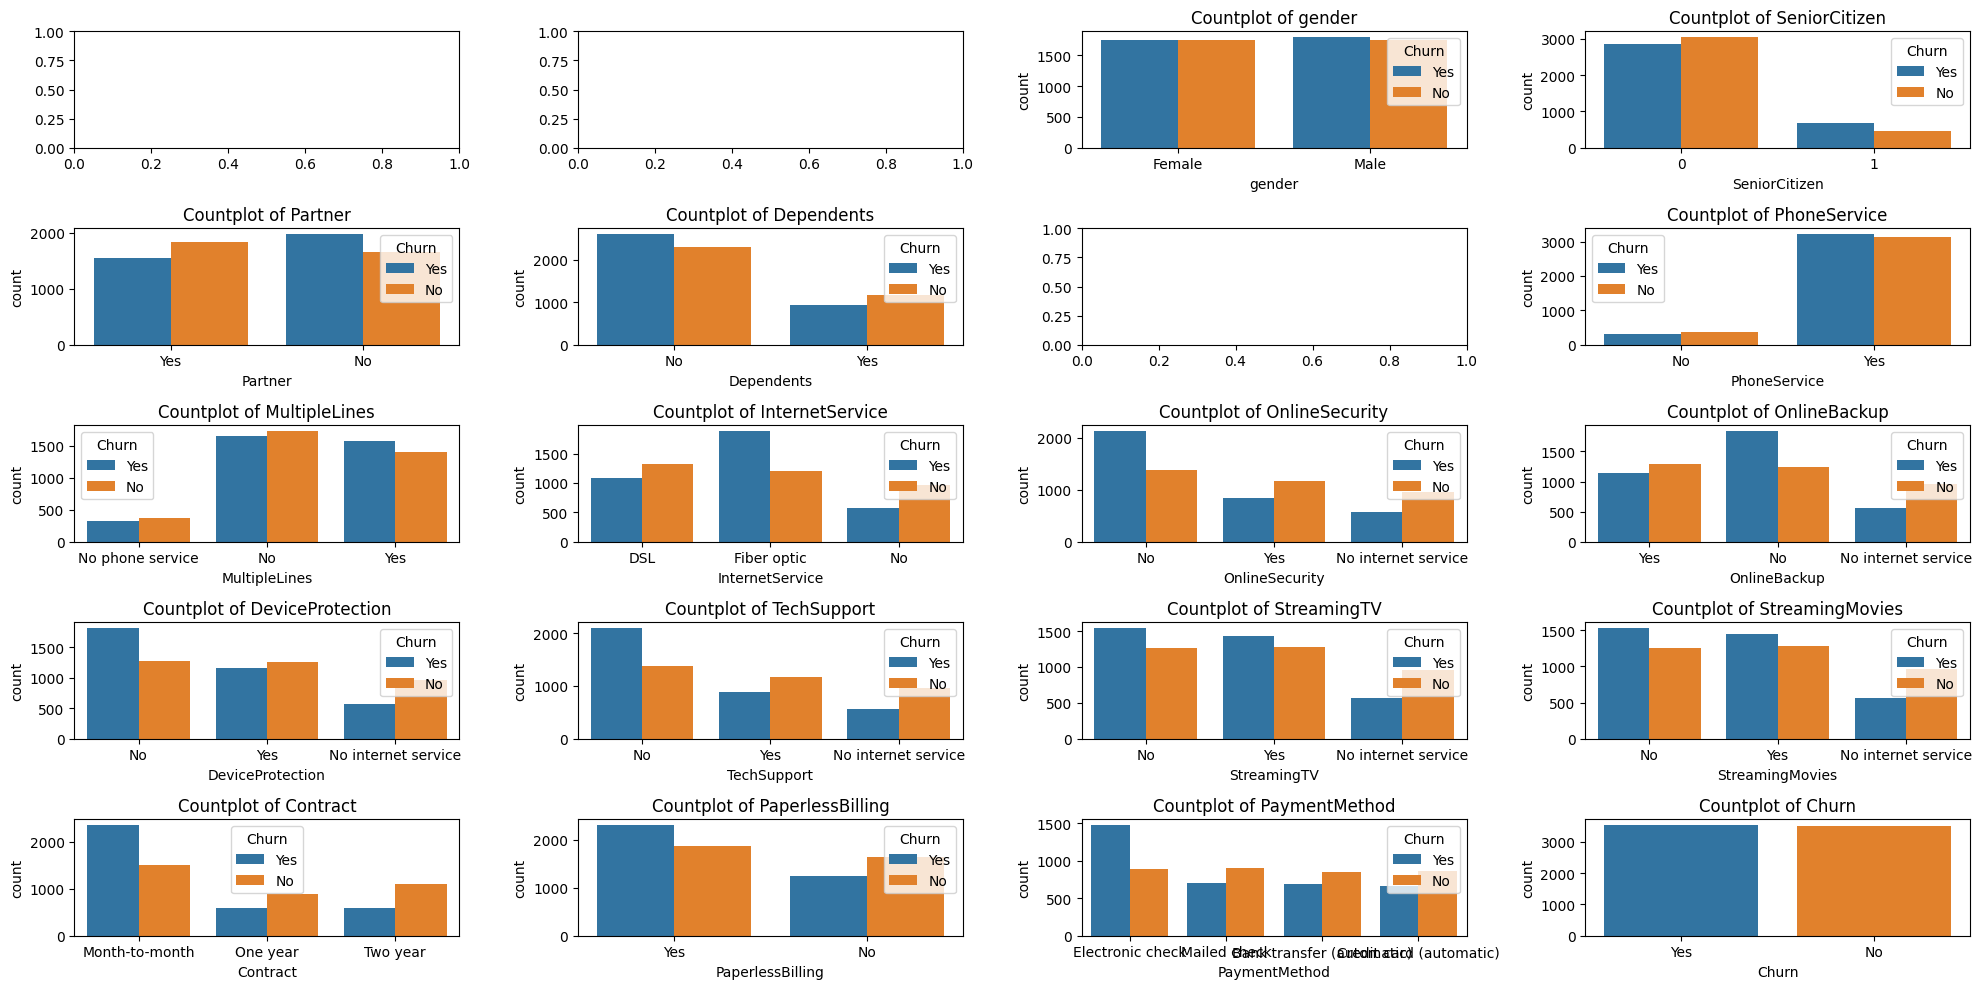

In [ ]:
#Visualize categorical data
fig, ax = plt.subplots(5, 4, figsize=(20, 10))
for i, col in enumerate(df.columns):
    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df, ax=ax[i//4, i%4],hue='Churn')
        ax[i//4, i%4].set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

<ipython-input-67-fc60392953d6>:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df.boxplot(column=['MonthlyCharges', 'TotalCharges','tenure'], by='Churn', ax=ax)


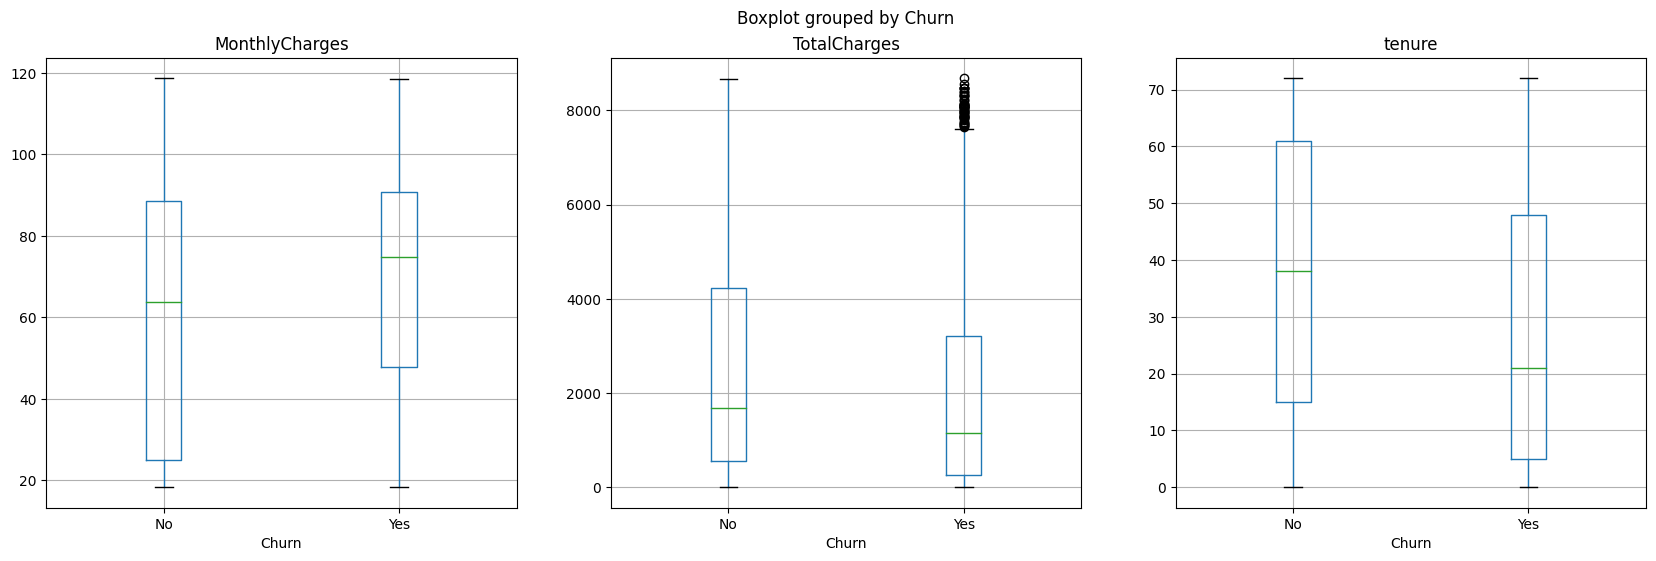

In [ ]:
#Visualize numerical data using boxplot
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
df.boxplot(column=['MonthlyCharges', 'TotalCharges','tenure'], by='Churn', ax=ax)
plt.show()

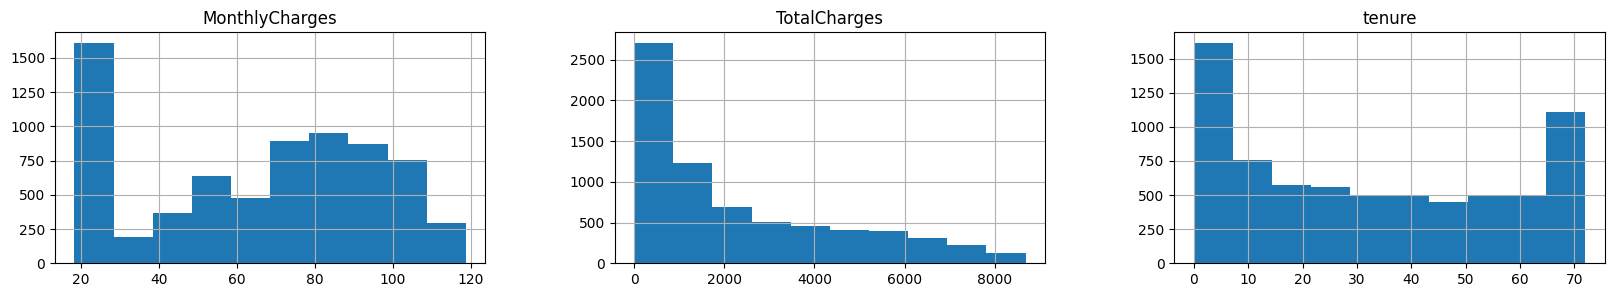

In [ ]:
#Visualize numerical data using histogram
fig, ax = plt.subplots(1, 3, figsize=(20, 3))
df.hist(column=['MonthlyCharges', 'TotalCharges','tenure'], ax=ax)
plt.show()


# 5. **DATA PREPROCESSING**

In [ ]:
#Transform dummy variable
df=pd.get_dummies(df,drop_first=True)

In [ ]:
# Separate features and labels
X = df.drop('Churn_Yes', axis=1)
Y = df['Churn_Yes']

# Split data 70%-30% into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)



# 6. **MODELING**

In [ ]:
#Define models
models={
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Neural Network': MLPClassifier()
}

In [ ]:
#Scale data with RobustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 7. **RESULTS**

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    prob=model.predict_proba(X_test)
    print(name)
    print('Accuracy: ', accuracy_score(Y_test, predictions))
    print("Overall Precision:", precision_score(Y_test, predictions))
    print("Overall Recall:", recall_score(Y_test, predictions))
    print(confusion_matrix(Y_test, predictions))
    print("AUC: ", roc_auc_score(Y_test, prob[:,1]))
    print("\n")


Logistic Regression
Accuracy:  0.6374822527212494
Overall Precision: 0.6502564102564102
Overall Recall: 0.5986779981114259
[[713 341]
 [425 634]]
AUC:  0.6755442193326202


Random Forest
Accuracy:  0.603880738286796
Overall Precision: 0.6151452282157677
Overall Recall: 0.5599622285174694
[[683 371]
 [466 593]]
AUC:  0.6467904990745271


XGBoost
Accuracy:  0.6000946521533365
Overall Precision: 0.6061507936507936
Overall Recall: 0.5769593956562795
[[657 397]
 [448 611]]
AUC:  0.6370949823774891


Neural Network
Accuracy:  0.6067203028868907
Overall Precision: 0.6059479553903345
Overall Recall: 0.615675165250236
[[630 424]
 [407 652]]
AUC:  0.6553755377687949




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 8. **BOOST**

In [ ]:
#Improve parameters for Logistic Regression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

#Train model with best parameter
model = LogisticRegression(C=grid_search.best_params_['C']).fit(X_train, Y_train)
predictions = model.predict(X_test)
prob=model.predict_proba(X_test)
print('Accuracy: ', accuracy_score(Y_test, predictions))
print("Overall Precision:", precision_score(Y_test, predictions))
print("Overall Recall:", recall_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print("AUC: ", roc_auc_score(Y_test, prob[:,1]))


Best parameters:  {'C': 0.01}
Best score:  0.6304259634888438
Accuracy:  0.63180312352106
Overall Precision: 0.6412060301507537
Overall Recall: 0.6024551463644948
[[697 357]
 [421 638]]
AUC:  0.6772240468882427
